Deepest Heading Levels:
URL: https://geoim.bloomberght.com, Deepest Heading Level: h1
URL: https://im.showtv.com.tr, Deepest Heading Level: h1
URL: https://mo.ciner.com.tr, Deepest Heading Level: h1
URL: https://www.google-analytics.com, Deepest Heading Level: h4
URL: https://www.haberturk.com, Deepest Heading Level: h2
URL: https://m.haberturk.com, Deepest Heading Level: h2
URL: https://www.haberturk.com/ekonomi, Deepest Heading Level: h2
URL: https://www.haberturk.com/ekonomi/altin, Deepest Heading Level: h3
URL: https://www.haberturk.com/ekonomi/piyasa/88-dolar, Deepest Heading Level: h2
URL: https://www.haberturk.com/ekonomi/piyasa/89-euro, Deepest Heading Level: h2
URL: https://www.haberturk.com/ekonomi/altin/610-gram-altin, Deepest Heading Level: h2
URL: https://www.haberturk.com/ekonomi/piyasa/1947-faiz, Deepest Heading Level: h2
URL: https://www.haberturk.com/ekonomi/piyasa/2211-bitcoin, Deepest Heading Level: h2
URL: https://www.haberturk.com/ekonomi/borsa, Deepest Heading Lev

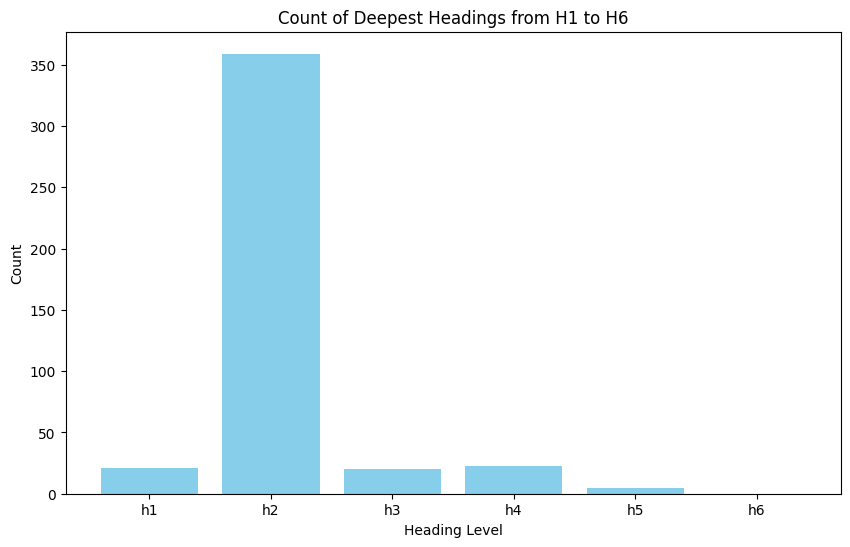

Bar chart saved to deepest_heading_levels.png


In [10]:
import json
import matplotlib.pyplot as plt

# load the JSON data
with open('url_headings.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# find the deepest heading level in a structure
def find_deepest_heading(headings):
    max_level = 0
    for heading, texts in headings.items():
        if texts:  # checks if the list of texts is not empty
            level = int(heading[1])
            if level > max_level:
                max_level = level
    return max_level

# list to hold the depth for each URL
url_depths = []

# dictionary to hold the count of deepest levels
deepest_level_counts = {
    'h1': 0,
    'h2': 0,
    'h3': 0,
    'h4': 0,
    'h5': 0,
    'h6': 0
}

# go through the data to find the deepest heading level
for entry in data:
    if entry['headings'] is not None:
        deepest_level = find_deepest_heading(entry['headings'])
        if deepest_level > 0:  # only consider valid heading levels
            url_depths.append({'url': entry['url'], 'deepest_level': deepest_level})
            deepest_level_counts[f'h{deepest_level}'] += 1

# results print
print("Deepest Heading Levels:")
for entry in url_depths:
    print(f"URL: {entry['url']}, Deepest Heading Level: h{entry['deepest_level']}")

# save the results to JSON
with open('heading_depths.json', 'w', encoding='utf-8') as json_file:
    json.dump(url_depths, json_file, indent=4, ensure_ascii=False)

# save the results to HTML
html_content = "<html><head><title>Deepest Heading Levels</title></head><body>"
html_content += "<h1>Deepest Heading Levels</h1>"
html_content += "<table border='1'><tr><th>URL</th><th>Deepest Heading Level</th></tr>"

for entry in url_depths:
    html_content += f"<tr><td>{entry['url']}</td><td>h{entry['deepest_level']}</td></tr>"

html_content += "</table></body></html>"

with open('heading_depths.html', 'w', encoding='utf-8') as html_file:
    html_file.write(html_content)

print("Deepest heading levels saved to heading_depths.json and heading_depths.html")

# bar chart for the deepest heading levels
headings = list(deepest_level_counts.keys())
counts = list(deepest_level_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(headings, counts, color='skyblue')
plt.xlabel('Heading Level')
plt.ylabel('Count')
plt.title('Count of Deepest Headings from H1 to H6')
plt.savefig('deepest_heading_levels.png')
plt.show()

print("Bar chart saved to deepest_heading_levels.png")
